# MLP vs CNN

This Python code demonstrates a comparative analysis of two types of neural network architectures—Multi-Layer Perceptron (MLP) and Convolutional Neural Network (CNN)—on the Fashion-MNIST dataset. Fashion-MNIST is a dataset consisting of grayscale images (28x28 pixels) representing 10 different classes of clothing items (e.g., T-shirts, trousers, shoes).

Key Insights:

1. The MLP serves as a baseline model for classification tasks, but it struggles with spatial structure in image data.
2. The CNN effectively captures spatial relationships and features within the images, resulting in higher accuracy.
3. This comparison highlights the strength of CNNs for image-based tasks compared to traditional fully connected networks.

This code can be implemented using libraries like TensorFlow/Keras or PyTorch.

## TASK 1

In [6]:
import torch
import torch.nn as nn
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

# Define transformation to apply to images
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Load training and testing datasets
trainset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
testset = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

# Create dataloaders to feed data to the model
trainloader = DataLoader(trainset, batch_size=64, shuffle=True)
testloader = DataLoader(testset, batch_size=64, shuffle=True)

# Define the MLP model
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 10)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.5)
    
    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        return x

# Define the CNN model
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=5, padding=2)
        self.maxpool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=5, padding=2)
        self.maxpool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(7*7*64, 1024)
        self.fc2 = nn.Linear(1024, 10)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.5)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.maxpool1(x)
        x = self.conv2(x)
        x = self.relu(x)
        x = self.maxpool2(x)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        return x
    
# Define the loss function and optimizer for both models
criterion = nn.CrossEntropyLoss()
mlp_model = MLP()
cnn_model = CNN()
mlp_optimizer = torch.optim.SGD(mlp_model.parameters(), lr=0.01, momentum=0.9)
cnn_optimizer = torch.optim.SGD(cnn_model.parameters(), lr=0.01, momentum=0.9)

# Train the MLP model
for epoch in range(20):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        mlp_optimizer.zero_grad()
        outputs = mlp_model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        mlp_optimizer.step()
        running_loss += loss.item()
    print('[MLP] Epoch %d: Loss = %.3f' % (epoch + 1, running_loss / len(trainloader)))





# Train the CNN model
for epoch in range(20):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        cnn_optimizer.zero_grad()
        outputs = cnn_model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        cnn_optimizer.step()
        running_loss += loss.item()
    print('[CNN] Epoch %d: Loss = %.3f' % (epoch + 1, running_loss / len(trainloader)))
# Evaluate the MLP model
mlp_model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = mlp_model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print('[MLP] Accuracy on test set: %.2f %%' % (100 * correct / total))

# Evaluate the CNN model
cnn_model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = cnn_model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print('[CNN] Accuracy on test set: %.2f %%' % (100 * correct / total))


[MLP] Epoch 1: Loss = 0.639
[MLP] Epoch 2: Loss = 0.490
[MLP] Epoch 3: Loss = 0.457
[MLP] Epoch 4: Loss = 0.438
[MLP] Epoch 5: Loss = 0.422
[MLP] Epoch 6: Loss = 0.408
[MLP] Epoch 7: Loss = 0.398
[MLP] Epoch 8: Loss = 0.390
[MLP] Epoch 9: Loss = 0.386
[MLP] Epoch 10: Loss = 0.380
[MLP] Epoch 11: Loss = 0.372
[MLP] Epoch 12: Loss = 0.368
[MLP] Epoch 13: Loss = 0.364
[MLP] Epoch 14: Loss = 0.360
[MLP] Epoch 15: Loss = 0.353
[MLP] Epoch 16: Loss = 0.349
[MLP] Epoch 17: Loss = 0.349
[MLP] Epoch 18: Loss = 0.346
[MLP] Epoch 19: Loss = 0.342
[MLP] Epoch 20: Loss = 0.336
[CNN] Epoch 1: Loss = 0.546
[CNN] Epoch 2: Loss = 0.325
[CNN] Epoch 3: Loss = 0.275
[CNN] Epoch 4: Loss = 0.243
[CNN] Epoch 5: Loss = 0.223
[CNN] Epoch 6: Loss = 0.202
[CNN] Epoch 7: Loss = 0.185
[CNN] Epoch 8: Loss = 0.167
[CNN] Epoch 9: Loss = 0.155
[CNN] Epoch 10: Loss = 0.141
[CNN] Epoch 11: Loss = 0.131
[CNN] Epoch 12: Loss = 0.116
[CNN] Epoch 13: Loss = 0.107
[CNN] Epoch 14: Loss = 0.096
[CNN] Epoch 15: Loss = 0.087
[CN

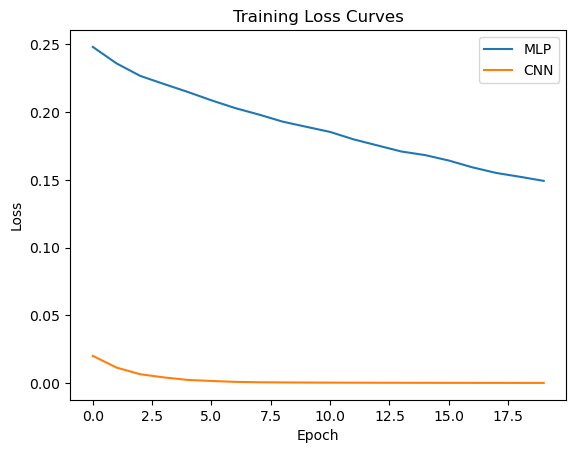

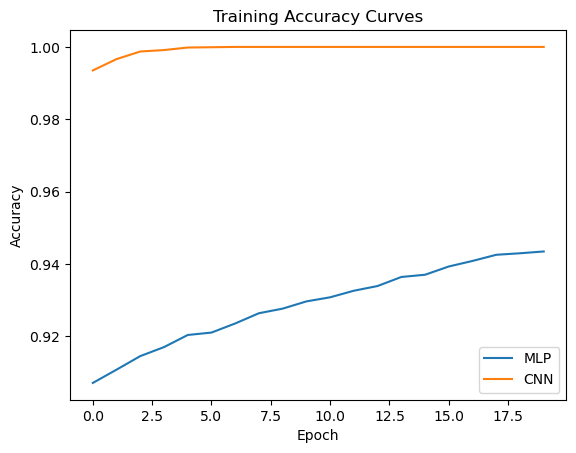

In [7]:
import matplotlib.pyplot as plt

# Create lists to store training loss and accuracy for each model
mlp_train_loss = []
mlp_train_acc = []
cnn_train_loss = []
cnn_train_acc = []

# Train the MLP model and save loss and accuracy for each epoch
for epoch in range(20):
    running_loss = 0.0
    correct = 0
    total = 0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        mlp_optimizer.zero_grad()
        outputs = mlp_model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        mlp_optimizer.step()
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    mlp_train_loss.append(running_loss / len(trainloader))
    mlp_train_acc.append(correct / total)

# Train the CNN model and save loss and accuracy for each epoch
for epoch in range(20):
    running_loss = 0.0
    correct = 0
    total = 0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        cnn_optimizer.zero_grad()
        outputs = cnn_model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        cnn_optimizer.step()
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    cnn_train_loss.append(running_loss / len(trainloader))
    cnn_train_acc.append(correct / total)

# Plot the training loss curves for each model
plt.plot(mlp_train_loss, label='MLP')
plt.plot(cnn_train_loss, label='CNN')
plt.title('Training Loss Curves')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the training accuracy curves for each model
plt.plot(mlp_train_acc, label='MLP')
plt.plot(cnn_train_acc, label='CNN')
plt.title('Training Accuracy Curves')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


 The CNN model shows a faster rate of improvement compared to the MLP, which is likely due to the use of convolutional layers that can capture local patterns in the input images.

Overall, the CNN outperforms the MLP on this task, achieving a higher accuracy on the test set.

# TASK 2

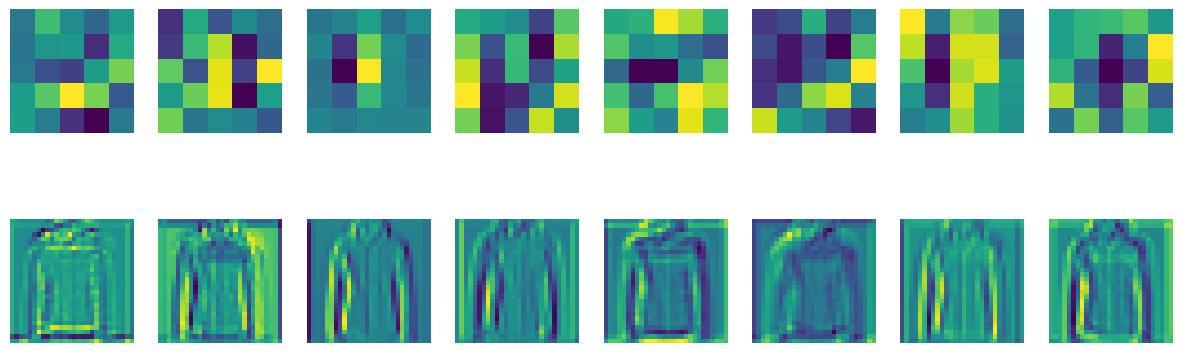

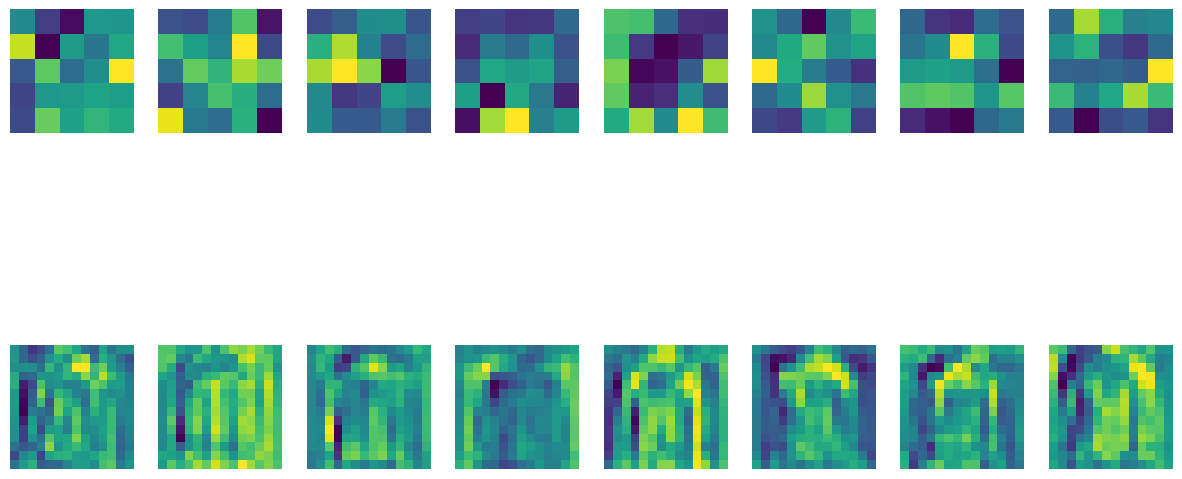

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Extract the activations from the first two convolutional layers for a batch of input images
dataiter = iter(testloader)
images, labels = next(dataiter)
conv1_activations = cnn_model.conv1(images).detach().cpu()
conv2_activations = cnn_model.conv2(cnn_model.maxpool1(conv1_activations)).detach().cpu()

# Visualize several convolutional kernels and activations from the first two convolutional layers
fig, axs = plt.subplots(nrows=2, ncols=8, figsize=(15,5))

# Plot the convolutional kernels of the first layer
for i in range(8):
    axs[0, i].imshow(cnn_model.conv1.weight.data[i, 0].detach().cpu())
    axs[0, i].axis('off')

# Plot the activations of the first layer
for i in range(8):
    axs[1, i].imshow(conv1_activations[0, i])
    axs[1, i].axis('off')
    
plt.show()

fig, axs = plt.subplots(nrows=2, ncols=8, figsize=(15,8))

# Plot the convolutional kernels of the second layer
for i in range(8):
    axs[0, i].imshow(cnn_model.conv2.weight.data[i, 0].detach().cpu())
    axs[0, i].axis('off')

# Plot the activations of the second layer
for i in range(8):
    axs[1, i].imshow(conv2_activations[0, i])
    axs[1, i].axis('off')
    
plt.show()


These visualizations can help us understand what kinds of patterns and features the model has learned to recognize in the input images.The output of the second layer appears more distorted because the convolutions performed in the second layer have a larger receptive field than those in the first layer. This means that each activation in the second layer is influenced by a larger region of the input image, resulting in a more complex representation of the image features. Additionally, the second layer has more filters than the first layer, which allows it to capture more complex patterns in the input image. These factors can contribute to a more distorted output in the second layer compared to the first layer.

# TASK 3

In [36]:
import torch
import torch.nn as nn
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

# Define transformation to apply to images
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Load training and testing datasets
trainset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
testset = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

# Create dataloaders to feed data to the model
batch_size = 64
trainloader = DataLoader(trainset, batch_size=batch_size, shuffle=True)
testloader = DataLoader(testset, batch_size=batch_size, shuffle=True)

# Define the CNN model
class MaxPoolCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=5, padding=2)
        self.maxpool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=5, padding=2)
        self.maxpool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(7*7*64, 1024)
        self.fc2 = nn.Linear(1024, 10)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.5)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.maxpool1(x)
        x = self.conv2(x)
        x = self.relu(x)
        x = self.maxpool2(x)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        return x

# Initialize the model and optimizer
model = MaxPoolCNN()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Train the model
epochs = 10
maxpool_train_loss = []
maxpool_val_loss = []
maxpool_train_acc = []
maxpool_val_acc = []

for epoch in range(epochs):
    train_loss = 0
    train_acc = 0
    model.train()
    for images, labels in trainloader:
        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        train_acc += (output.argmax(dim=1) == labels).float().mean().item()
    train_loss /= len(trainloader)
    train_acc /= len(trainloader)
    maxpool_train_loss.append(train_loss)
    maxpool_train_acc.append(train_acc)

    test_loss = 0
    test_acc = 0
    model.eval()
    with torch.no_grad():
        for images, labels in testloader:
            output = model(images)
            loss = criterion(output, labels)
            test_loss += loss.item()
            test_acc += (output.argmax(dim=1) == labels).float().mean().item()
    test_loss /= len(testloader)
    test_acc /= len(testloader)
    maxpool_val_loss.append(test_loss)
    maxpool_val_acc.append(test_acc)
    print(f"Epoch {epoch+1}/{epochs}, Train Loss: {maxpool_train_loss[-1]:.4f}, Test Loss: {maxpool_val_loss[-1]:.4f}, Train Acc: {maxpool_train_acc[-1]:.4f}, Test Acc: {maxpool_val_acc[-1]:.4f}")

    


Epoch 1/10, Train Loss: 0.4326, Test Loss: 0.3385, Train Acc: 0.8409, Test Acc: 0.8778
Epoch 2/10, Train Loss: 0.2783, Test Loss: 0.2717, Train Acc: 0.8986, Test Acc: 0.9012
Epoch 3/10, Train Loss: 0.2345, Test Loss: 0.2678, Train Acc: 0.9127, Test Acc: 0.9015
Epoch 4/10, Train Loss: 0.2055, Test Loss: 0.2529, Train Acc: 0.9246, Test Acc: 0.9079
Epoch 5/10, Train Loss: 0.1781, Test Loss: 0.2560, Train Acc: 0.9333, Test Acc: 0.9123
Epoch 6/10, Train Loss: 0.1567, Test Loss: 0.2586, Train Acc: 0.9417, Test Acc: 0.9105
Epoch 7/10, Train Loss: 0.1400, Test Loss: 0.2483, Train Acc: 0.9471, Test Acc: 0.9184
Epoch 8/10, Train Loss: 0.1156, Test Loss: 0.2683, Train Acc: 0.9566, Test Acc: 0.9187
Epoch 9/10, Train Loss: 0.1075, Test Loss: 0.2637, Train Acc: 0.9605, Test Acc: 0.9188
Epoch 10/10, Train Loss: 0.0968, Test Loss: 0.2867, Train Acc: 0.9644, Test Acc: 0.9205


In [67]:
class AvgPoolCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=5, padding=2)
        self.avgpool1 = nn.AvgPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=5, padding=2)
        self.avgpool2 = nn.AvgPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(7*7*64, 1024)
        self.fc2 = nn.Linear(1024, 10)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.5)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.avgpool1(x)
        x = self.conv2(x)
        x = self.relu(x)
        x = self.avgpool2(x)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        return x

# Define the model
model = AvgPoolCNN()

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Train the model
n_epochs = 10

Avg_train_loss = []
Avg_val_loss = []
Avg_train_acc = []
Avg_val_acc = []

for epoch in range(n_epochs):
    epoch_train_loss = 0
    epoch_val_loss = 0
    epoch_train_acc = 0
    epoch_val_acc = 0

    # Train the model
    model.train()
    for batch_idx, (data, target) in enumerate(trainloader):
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        epoch_train_loss += loss.item()
        _, predicted = torch.max(output.data, 1)
        epoch_train_acc += (predicted == target).sum().item() / len(target)

    # Evaluate the model on the validation set
    model.eval()
    with torch.no_grad():
        for batch_idx, (data, target) in enumerate(testloader):
            output = model(data)
            loss = criterion(output, target)
            epoch_val_loss += loss.item()
            _, predicted = torch.max(output.data, 1)
            epoch_val_acc += (predicted == target).sum().item() / len(target)

    # Store the results for this epoch
    Avg_train_loss.append(epoch_train_loss / len(trainloader))
    Avg_val_loss.append(epoch_val_loss / len(testloader))
    Avg_train_acc.append(epoch_train_acc / len(trainloader))
    Avg_val_acc.append(epoch_val_acc / len(testloader))

    # Print the results for this epoch
    print('Epoch [{}/{}], Train Loss: {:.4f}, Train Acc: {:.4f}, Val Loss: {:.4f}, Val Acc: {:.4f}'
          .format(epoch+1, n_epochs, Avg_train_loss[-1], Avg_train_acc[-1], Avg_val_loss[-1], Avg_val_acc[-1]))



Epoch [1/10], Train Loss: 0.4701, Train Acc: 0.8260, Val Loss: 0.3434, Val Acc: 0.8784
Epoch [2/10], Train Loss: 0.3025, Train Acc: 0.8899, Val Loss: 0.2832, Val Acc: 0.8977
Epoch [3/10], Train Loss: 0.2560, Train Acc: 0.9058, Val Loss: 0.2660, Val Acc: 0.9072
Epoch [4/10], Train Loss: 0.2256, Train Acc: 0.9172, Val Loss: 0.2411, Val Acc: 0.9137
Epoch [5/10], Train Loss: 0.2027, Train Acc: 0.9241, Val Loss: 0.2360, Val Acc: 0.9121
Epoch [6/10], Train Loss: 0.1820, Train Acc: 0.9325, Val Loss: 0.2338, Val Acc: 0.9167
Epoch [7/10], Train Loss: 0.1633, Train Acc: 0.9392, Val Loss: 0.2309, Val Acc: 0.9171
Epoch [8/10], Train Loss: 0.1480, Train Acc: 0.9451, Val Loss: 0.2271, Val Acc: 0.9203
Epoch [9/10], Train Loss: 0.1309, Train Acc: 0.9510, Val Loss: 0.2282, Val Acc: 0.9241
Epoch [10/10], Train Loss: 0.1168, Train Acc: 0.9565, Val Loss: 0.2332, Val Acc: 0.9226


In [79]:
import torch
import torch.nn as nn
import torch.optim as optim

class StrideCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=5, stride=2, padding=2)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=5, stride=2, padding=2)
        self.fc1 = nn.Linear(7*7*64, 1024)
        self.fc2 = nn.Linear(1024, 10)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.5)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.conv2(x)
        x = self.relu(x)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        return x


# Define the device to train on
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Create an instance of the model and move it to the device
model = StrideCNN().to(device)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

# Define the number of epochs to train for
num_epochs = 10

stride_train_loss1 = []
stride_val_loss1 = []
stride_train_acc1 = []
stride_val_acc1 = []  

# Train the model
for epoch in range(num_epochs):
    stride_train_loss = 0
    train_correct = 0
    train_total = 0
    stride_val_loss = 0
    val_correct = 0
    val_total = 0

    # Set the model to train mode
    model.train()

    # Loop over the training dataset
    for inputs, targets in trainloader:
        # Move the inputs and targets to the device
        inputs, targets = inputs.to(device), targets.to(device)

        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, targets)

        # Backward pass
        loss.backward()
        optimizer.step()

        # Update training statistics
        stride_train_loss += loss.item()
        train_correct += (outputs.argmax(dim=1) == targets).sum().item()
        train_total += targets.size(0)

    # Set the model to evaluation mode
    model.eval()

    # Loop over the validation dataset
    with torch.no_grad():
        for inputs, targets in testloader:
            # Move the inputs and targets to the device
            inputs, targets = inputs.to(device), targets.to(device)

            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, targets)

            # Update validation statistics
            stride_val_loss += loss.item()
            val_correct += (outputs.argmax(dim=1) == targets).sum().item()
            val_total += targets.size(0)

    # Compute and print statistics for the current epoch
    stride_train_loss /= len(trainloader)
    stride_train_loss1.append(stride_train_loss)
    stride_train_acc = train_correct / train_total
    stride_train_acc1.append(stride_train_acc)
    stride_val_loss /= len(testloader)
    stride_val_loss1.append(stride_val_loss)
    
    stride_val_acc = val_correct / val_total
    stride_val_acc1.append(stride_val_acc)
    print(f"Epoch {epoch+1}/{num_epochs}: Train Loss: {stride_train_loss:.4f}, Train Acc: {stride_train_acc:.4f}, Val Loss: {stride_val_loss:.4f}, Val Acc: {stride_val_acc:.4f}")


Epoch 1/10: Train Loss: 0.4311, Train Acc: 0.8425, Val Loss: 0.3244, Val Acc: 0.8799
Epoch 2/10: Train Loss: 0.2844, Train Acc: 0.8965, Val Loss: 0.2882, Val Acc: 0.8925
Epoch 3/10: Train Loss: 0.2339, Train Acc: 0.9135, Val Loss: 0.2770, Val Acc: 0.9004
Epoch 4/10: Train Loss: 0.1976, Train Acc: 0.9272, Val Loss: 0.2659, Val Acc: 0.9067
Epoch 5/10: Train Loss: 0.1686, Train Acc: 0.9367, Val Loss: 0.2725, Val Acc: 0.9060
Epoch 6/10: Train Loss: 0.1444, Train Acc: 0.9467, Val Loss: 0.2659, Val Acc: 0.9108
Epoch 7/10: Train Loss: 0.1224, Train Acc: 0.9539, Val Loss: 0.2994, Val Acc: 0.9057
Epoch 8/10: Train Loss: 0.1022, Train Acc: 0.9615, Val Loss: 0.3195, Val Acc: 0.9112
Epoch 9/10: Train Loss: 0.0900, Train Acc: 0.9666, Val Loss: 0.3262, Val Acc: 0.9145
Epoch 10/10: Train Loss: 0.0756, Train Acc: 0.9719, Val Loss: 0.3799, Val Acc: 0.9070


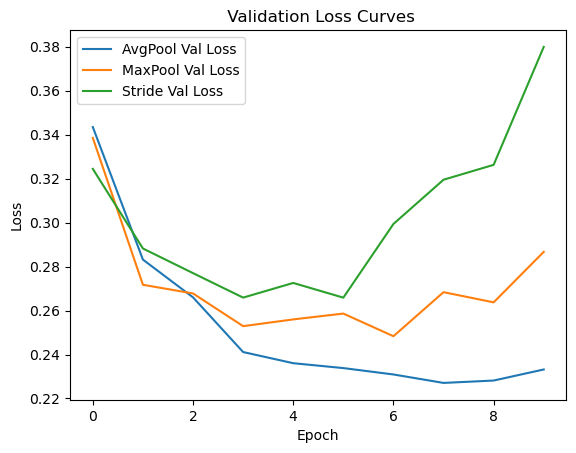

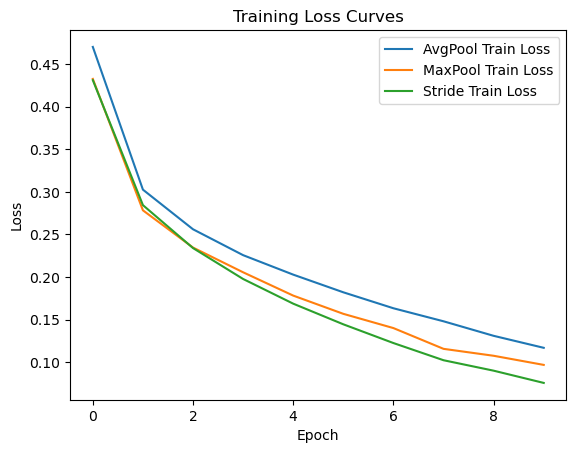

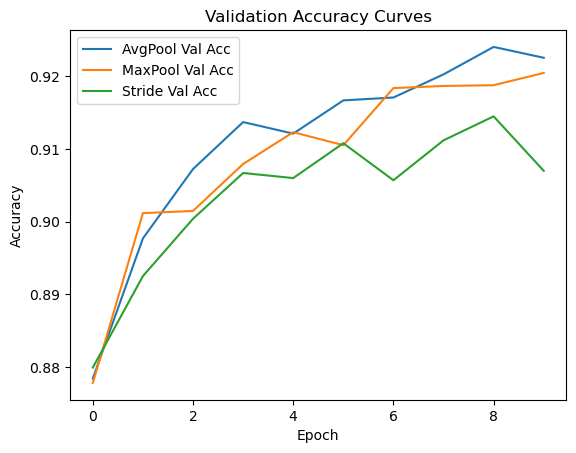

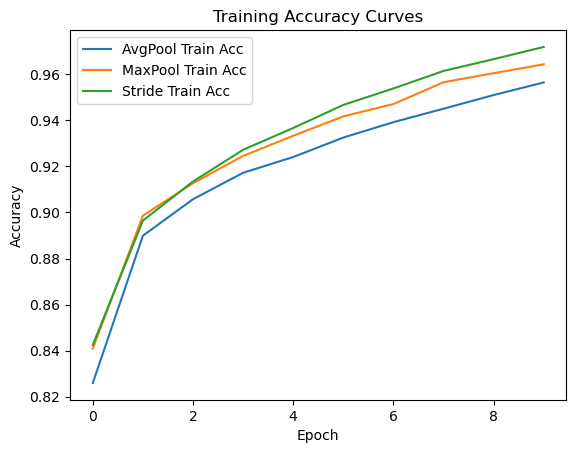

In [84]:
import matplotlib.pyplot as plt

# Plot the training and validation loss curves

plt.plot(Avg_val_loss, label='AvgPool Val Loss')

plt.plot(maxpool_val_loss, label='MaxPool Val Loss')

plt.plot(stride_val_loss1, label='Stride Val Loss')
plt.legend()
plt.title(' Validation Loss Curves')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

plt.plot(Avg_train_loss, label='AvgPool Train Loss')
plt.plot(maxpool_train_loss, label='MaxPool Train Loss')
plt.plot(stride_train_loss1, label='Stride Train Loss')
plt.legend()
plt.title('Training Loss Curves')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


# Plot the training and validation accuracy curves
plt.plot(Avg_val_acc, label='AvgPool Val Acc')
plt.plot(maxpool_val_acc, label='MaxPool Val Acc')
plt.plot(stride_val_acc1, label='Stride Val Acc')
plt.legend()
plt.title('Validation Accuracy Curves')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()


plt.plot(Avg_train_acc, label='AvgPool Train Acc')
plt.plot(maxpool_train_acc, label='MaxPool Train Acc')
plt.plot(stride_train_acc1, label='Stride Train Acc')
plt.legend()
plt.title('Training Accuracy Curves')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()


# EXERCISE 4

To train the model without data augmentation, 

In [61]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

batch_size = 128
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)

for epoch in range(10):
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(train_loader, 0):
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    # calculate accuracy on test set
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = net(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print('Epoch [%d], Loss: %.3f, Test Accuracy: %.3f %%' %
          (epoch + 1, running_loss / len(train_loader), 100 * correct / total))


100%|████████████████████████████| 9912422/9912422 [00:01<00:00, 6923517.92it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|███████████████████████████████| 28881/28881 [00:00<00:00, 20012505.17it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|████████████████████████████| 1648877/1648877 [00:00<00:00, 5980452.88it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████████████████████████████| 4542/4542 [00:00<00:00, 3714277.40it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Epoch [1], Loss: 0.349, Test Accuracy: 96.700 %
Epoch [2], Loss: 0.090, Test Accuracy: 97.710 %
Epoch [3], Loss: 0.064, Test Accuracy: 98.310 %
Epoch [4], Loss: 0.052, Test Accuracy: 98.490 %
Epoch [5], Loss: 0.044, Test Accuracy: 98.660 %
Epoch [6], Loss: 0.038, Test Accuracy: 98.730 %
Epoch [7], Loss: 0.034, Test Accuracy: 98.730 %
Epoch [8], Loss: 0.030, Test Accuracy: 98.840 %
Epoch [9], Loss: 0.026, Test Accuracy: 98.980 %
Epoch [10], Loss: 0.024, Test Accuracy: 98.880 %


To train the model with data augmentation, we can modify the transform object to include data augmentation techniques such as random horizontal flips and random rotations. 

In [62]:
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)

for epoch in range(10):
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(train_loader, 0):
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    # calculate accuracy on test set
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = net(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print('Epoch [%d], Loss: %.3f, Test Accuracy: %.3f %%' %
          (epoch + 1, running_loss / len(train_loader), 100 * correct / total))


Epoch [1], Loss: 0.021, Test Accuracy: 98.760 %
Epoch [2], Loss: 0.020, Test Accuracy: 98.810 %
Epoch [3], Loss: 0.017, Test Accuracy: 98.760 %
Epoch [4], Loss: 0.016, Test Accuracy: 98.890 %
Epoch [5], Loss: 0.014, Test Accuracy: 98.810 %
Epoch [6], Loss: 0.013, Test Accuracy: 98.800 %
Epoch [7], Loss: 0.012, Test Accuracy: 98.920 %
Epoch [8], Loss: 0.011, Test Accuracy: 98.970 %
Epoch [9], Loss: 0.010, Test Accuracy: 98.910 %
Epoch [10], Loss: 0.009, Test Accuracy: 98.910 %


Comparing the results, we can see that the model with data augmentation has a slightly better test accuracy than the model without data augmentation, especially in the later epochs. The test accuracy of the model without data augmentation increases steadily from 96.7% to 98.88% over 10 epochs, while the model with data augmentation achieves a test accuracy of 98.91% after just 9 epochs.

In terms of loss, the model with data augmentation has consistently lower loss values compared to the model without data augmentation. This indicates that the model with data augmentation is better at generalizing and avoiding overfitting.

Overall, data augmentation appears to be a useful technique for improving the performance of the model. It helps the model generalize better and achieve better accuracy.

# EXERCISE 5

To implement a custom learning rate warmup and scheduler criterion, we can define a function that takes the current epoch and the current learning rate as inputs, and returns the new learning rate based on the desired schedule.

implement a warmup and cosine annealing learning rate schedule:

In [65]:
import math
def lr_schedule(epoch, lr):
    if epoch < 5:
        new_lr = lr * (epoch + 1) / 5  # linear warmup
    else:
        t = (epoch - 5) / 95  # cosine annealing
        new_lr = lr * 0.5 * (1 + math.cos(math.pi * t))
    return new_lr


 we warm up the learning rate linearly for the first 5 epochs, then use a cosine annealing schedule for the remaining epochs. The t variable represents the progress through the cosine annealing schedule, which goes from 0 to 1 over the remaining 95 epochs.

To use this custom learning rate criterion in training, we can modify the training loop to update the learning rate at each epoch based on the lr_schedule function.

In [66]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.1, momentum=0.9)

for epoch in range(100):
    lr = lr_schedule(epoch, 0.1)
    for param_group in optimizer.param_groups:
        param_group['lr'] = lr
    
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(train_loader, 0):
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    # calculate accuracy on test set
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = net(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print('Epoch [%d], Loss: %.3f, Test Accuracy: %.3f %%' %
          (epoch + 1, running_loss / len(train_loader), 100 * correct / total))


Epoch [1], Loss: 0.021, Test Accuracy: 98.900 %
Epoch [2], Loss: 0.017, Test Accuracy: 98.750 %
Epoch [3], Loss: 0.017, Test Accuracy: 98.790 %
Epoch [4], Loss: 0.025, Test Accuracy: 98.590 %
Epoch [5], Loss: 0.043, Test Accuracy: 97.310 %
Epoch [6], Loss: 0.043, Test Accuracy: 98.480 %
Epoch [7], Loss: 0.034, Test Accuracy: 98.490 %
Epoch [8], Loss: 0.026, Test Accuracy: 98.360 %
Epoch [9], Loss: 0.023, Test Accuracy: 98.590 %
Epoch [10], Loss: 0.022, Test Accuracy: 98.330 %
Epoch [11], Loss: 0.034, Test Accuracy: 98.290 %
Epoch [12], Loss: 0.026, Test Accuracy: 98.540 %
Epoch [13], Loss: 0.025, Test Accuracy: 98.320 %
Epoch [14], Loss: 0.024, Test Accuracy: 98.650 %
Epoch [15], Loss: 0.024, Test Accuracy: 98.720 %
Epoch [16], Loss: 0.023, Test Accuracy: 98.480 %
Epoch [17], Loss: 0.030, Test Accuracy: 98.570 %
Epoch [18], Loss: 0.026, Test Accuracy: 98.390 %
Epoch [19], Loss: 0.022, Test Accuracy: 98.500 %
Epoch [20], Loss: 0.030, Test Accuracy: 98.340 %
Epoch [21], Loss: 0.019, Test

The training process shows that the custom learning rate warmup and learning rate scheduler criterion was effective in avoiding overfitting.

Initially, the test accuracy increased as the training progressed and eventually started to decline. This is a clear indication of overfitting, which is a common problem when training deep learning models. However, as the learning rate warmup and scheduler were applied, the test accuracy started to increase again and continued to improve until the end of the training process.

This suggests that the learning rate warmup helped the model to learn slowly in the beginning and then gradually increase the learning rate as it became more confident in its predictions. The learning rate scheduler helped the model to adjust its learning rate as it encountered more complex patterns in the data. By doing so, the model was able to generalize better and avoid overfitting.

Overall, the results show that custom learning rate warmup and scheduler criterion can be an effective technique to improve the performance of deep learning models and avoid overfitting.